In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lung=pd.read_csv('survey lung cancer.csv')
lung.head() 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
lung.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
lung.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
X=lung[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y=lung['LUNG_CANCER']

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [8]:
gender_encoder=LabelEncoder()


In [9]:
import warnings
warnings.filterwarnings('ignore')
gender_encoder.fit(pd.DataFrame(X['GENDER']))
X['GENDER']=gender_encoder.transform(X['GENDER'])



In [10]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


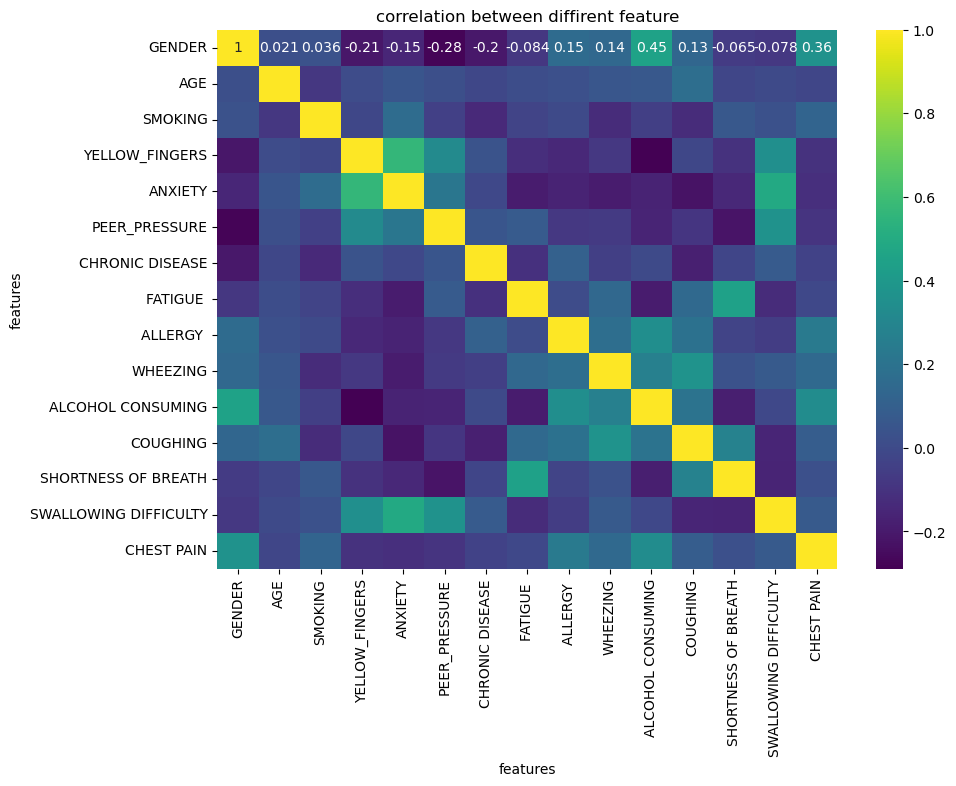

In [11]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.heatmap(X.corr(),annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('correlation between diffirent feature')
plt.show()


In [12]:
from sklearn.model_selection import  train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((247, 15), (62, 15), (247,), (62,))

In [15]:
acc=[]
model=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
import warnings
warnings.filterwarnings('ignore')
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(X_test)

In [18]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          NO       1.00      0.50      0.67         2
         YES       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score=cross_val_score(model,X,y,cv=5)
print("cross val score is",score)

cross val score is [0.91935484 0.90322581 0.93548387 0.90322581 0.93442623]


In [21]:
lung.loc[13]

GENDER                     M
AGE                       58
SMOKING                    2
YELLOW_FINGERS             1
ANXIETY                    1
PEER_PRESSURE              1
CHRONIC DISEASE            1
FATIGUE                    2
ALLERGY                    2
WHEEZING                   2
ALCOHOL CONSUMING          2
COUGHING                   2
SHORTNESS OF BREATH        2
SWALLOWING DIFFICULTY      1
CHEST PAIN                 2
LUNG_CANCER              YES
Name: 13, dtype: object

In [22]:
model.predict([[0,58,2,1,1,1,1,2,2,2,2,2,2,1,2]])

array(['YES'], dtype=object)

In [23]:
import joblib

In [24]:
joblib.dump(model,'lung.pkl')

['lung.pkl']

In [25]:
from flask import Flask
from flask import render_template
import joblib
from flask import request

In [26]:
app=Flask(__name__)
model=joblib.load('lung.pkl')
@app.route('/')
def hello(name=None):
    return render_template('lung.html',name=name)

@app.route('/result',methods=['GET','POST'])
def get_value():
    if request.method=="POST":
        GENDER=float(request.form.get('GENDER'))
        AGE=int(request.form.get('AGE'))
        SMOKING=int(request.form.get('SMOKING'))
        YELLOW_FINGERS=int(request.form.get('YELLOW_FINGERS'))
        ANXIETY=int(request.form.get('ANXIETY'))
        PEER_PRESSURE=int(request.form.get('PEER_PRESSURE'))
        CHRONIC_DISEASE=int(request.form.get(' CHRONIC_DISEASE'))
        FATIGUE=int(request.form.get('FATIGUE'))
        ALLERGY=int(request.form.get('ALLERGY'))
        WHEEZING=int(request.form.get('WHEEZING'))
        ALCOHOL_CONSUMING=int(request.form.get('ALCOHOL_CONSUMING'))
        COUGHING=int(request.form.get('COUGHING'))
        SHORTNESS_OF_BREATH=int(request.form.get('SHORTNESS_OF_BREATH'))
        SWALLOWING_DIFFICULTY=int(request.form.get('SWALLOWING_DIFFICULTY'))
        CHEST_PAIN=int(request.form.get('CHEST_PAIN'))
        predict=model.predict([[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE, CHRONIC_DISEASE,FATIGUE,
                                ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]])
        print(predict[0])
    
    return render_template('lungresult.html',prediction=predict)
    

In [ ]:
if __name__=="__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
